In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [36]:
data = pd.read_csv("data.csv")
df = pd.DataFrame(data) # Converting data to Panda DataFrame
df.describe() #gives statistics about the columns of the dataframe

,Input,instructionCount,ilp32,ilp256,ilp2048,ilp65536,memops,ctrlops,intops,flops,...,lbdiv16,lbdiv32,lbdiv64,lbdiv128,lbdiv256,lbdiv512,lbdiv1024,probsize,CPU Time,GPU Time
count,7.000000e+01,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000,70.000000
mean,9.593459e+06,8.176616e+09,5.166737,10.632676,52.235813,602.663894,0.702428,0.115766,0.759078,0.180314,...,0.001498,0.002398,0.003020,0.003678,0.004836,0.006450,0.007922,8.241314e+04,21.596759,8.860073
std,4.423048e+07,1.354990e+10,1.494906,7.877655,120.292780,1911.347976,0.094883,0.069429,0.117017,0.140990,...,0.004297,0.006923,0.007819,0.008218,0.009572,0.011566,0.013372,3.981780e+05,34.152407,13.214123
min,2.560000e+02,2.623345e+07,1.442210,1.918572,2.560310,2.570037,0.536474,0.007327,0.518805,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.183176,0.161771
25%,1.024000e+03,4.372837e+08,4.261939,5.667085,5.680151,8.661416,0.619048,0.071859,0.635411,0.000755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.250000e+00,2.221930,0.709906
50%,1.118000e+04,2.722508e+09,5.666621,9.262087,10.336074,14.798420,0.689421,0.098434,0.818305,0.192003,...,0.000005,0.000010,0.000020,0.000034,0.000045,0.000085,0.000108,8.350000e+01,10.304666,2.776416
75%,1.000000e+05,8.077988e+09,6.372349,13.014492,22.103983,163.359717,0.779246,0.145357,0.846084,0.246726,...,0.000450,0.000846,0.001625,0.003093,0.005964,0.009350,0.012055,9.090000e+02,25.948320,12.719192
max,3.000000e+08,6.800022e+10,7.197260,37.911765,534.000000,9023.000000,0.890129,0.307693,0.886846,0.523809,...,0.022252,0.033237,0.035963,0.035963,0.038352,0.038502,0.038502,2.706416e+06,229.742435,59.670559


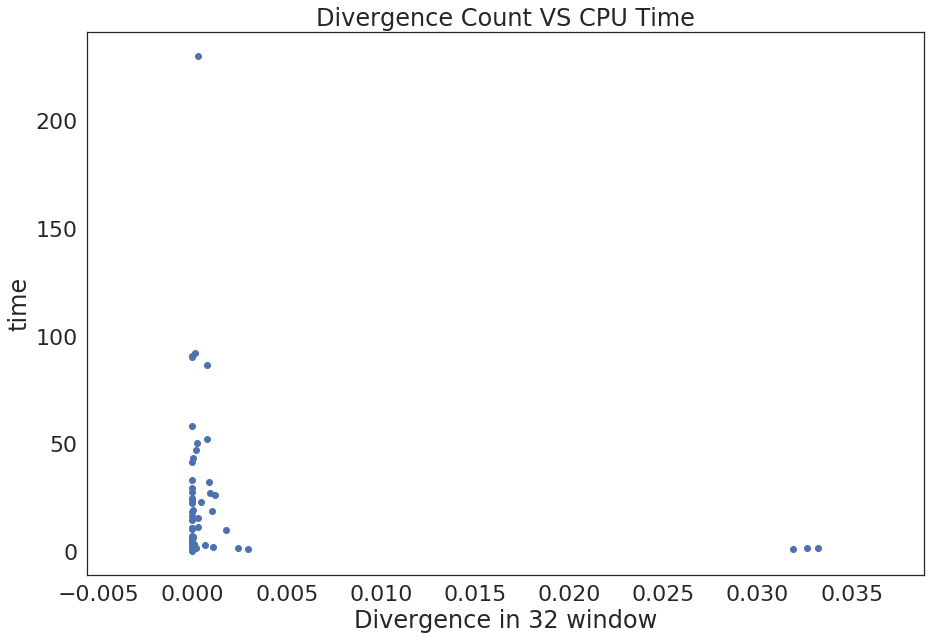

In [26]:
df_Y = df[df['Class'] == "Y"]

plt.figure(figsize=(15,10))
plt.scatter(df_Y['lbdiv32'], df_Y['CPU Time']) 
plt.title('Divergence Count VS CPU Time')
plt.xlabel('Divergence in 32 window')
plt.ylabel('time')
plt.show()

In [27]:
yes = len(data[data.Class == "Y"])
No = len(data[data.Class == "N"])

print yes
print No

58
12


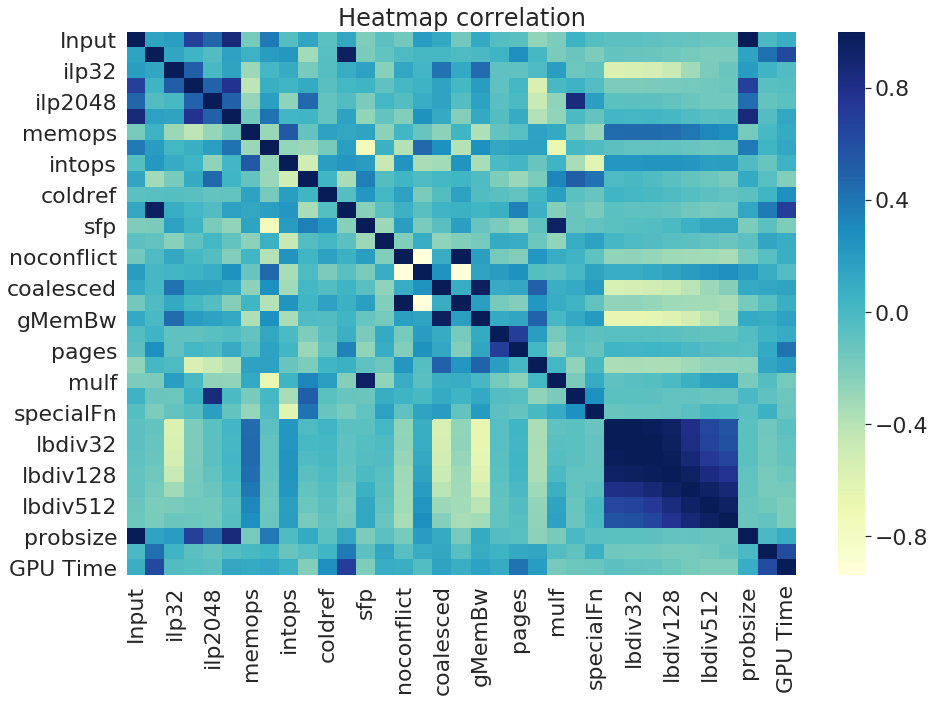

In [28]:
df_corr = df.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") #Get an idea of correlation between the features
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [29]:
X_train = df.drop(['CPU Time','GPU Time','Class','dataSet','Input'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df['Class'] # We create our label
X_train = np.asarray(X_train)
Y_train = np.asarray(y_train)


In [30]:
reg = KNeighborsClassifier(n_jobs=-1)
reg.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
#test dataset
test = pd.read_csv("test.csv")
df_test = pd.DataFrame(test) #reading test dataset

X_test = df_test.drop(['CPU Time','GPU Time','Class','dataSet','Input'],axis=1)
Y_test =df_test['Class'] # We create our label

X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

#test prediction
prediction = reg.predict(X_test)
print prediction


['Y' 'Y' 'Y' 'Y' 'Y' 'Y']


In [32]:
RFClassifier = RandomForestClassifier(n_estimators=10)
RFClassifier.fit(X_train,Y_train )
RFPrediction = reg.predict(X_test)
print prediction

['Y' 'Y' 'Y' 'Y' 'Y' 'Y']


In [ ]:
# SVC with linear kernel
C = 1.0
svc = SVC(kernel='linear', C=C).fit(X_train, y_train)
predict_svc = svc.predict(X_test)
print predict_svc
# LinearSVC (linear kernel)
#lin_svc = svm.LinearSVC(C=C).fit(X, y)
# SVC with RBF kernel
#rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# SVC with polynomial (degree 3) kernel
#poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)